In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

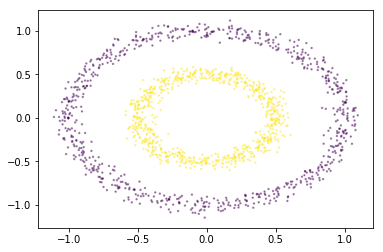

In [2]:
#
# Input data
#

# generate random points, 800 samples, 3 centers
from sklearn.datasets import make_blobs
from sklearn import cluster, datasets, mixture

n_samples = 1500
data, labels = datasets.make_circles(n_samples=1500, factor=.5, noise=.05)

# plot data
plt.scatter(data[:,0], data[:,1], c=labels, alpha=0.4, s=2)
plt.show()

In [3]:
#
# TensorFlow model
#
input_features = data.shape[1]
output_features = len(set(labels))
hidden_units = 4

x = tf.placeholder(tf.float32, shape=(None, input_features), name='input')
y = tf.placeholder(tf.uint8, name='correct_output')

# converter from label to one hot vector (e.g: 0 => [1, 0, 0]; 2 => [0, 0, 1])
y_hot = tf.one_hot(y, output_features)

# weights and bias
w_hidden = tf.Variable(tf.random_uniform( (input_features, hidden_units) ))
b_hidden = tf.Variable(tf.random_uniform( (1, hidden_units) ))
layer1 = tf.nn.tanh(tf.add(tf.matmul(x, w_hidden), b_hidden))

w = tf.Variable(tf.random_uniform( (hidden_units, output_features) ))
b = tf.Variable(tf.random_uniform( (1, output_features) ))
output = tf.add(tf.matmul(layer1, w), b)

# converter from one hot vector to labels (e.g: [1, 0, 0] => 0; [0, 0, 1] => 2)
output_labels = tf.argmax(output, axis=1)

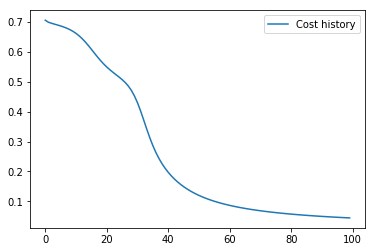

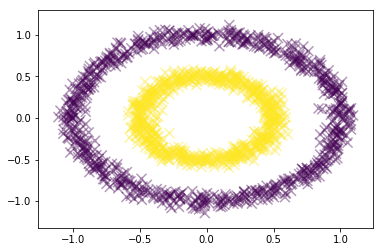

In [4]:
# cost function
cost = tf.losses.softmax_cross_entropy(y_hot, output)

# gradient descent
optimizer = tf.train.GradientDescentOptimizer(0.3).minimize(cost)

# run training session
sess = tf.Session()
sess.run(tf.global_variables_initializer())
cost_history = []
for epoch in range(1000):
    sess.run(optimizer, feed_dict={x:data, y:labels})
    if epoch % 10 == 0:
        cost_history.append( sess.run(cost, feed_dict={x:data, y:labels}) )

predicted_labels = sess.run(output_labels, feed_dict={x:data, y:labels})
plt.plot(cost_history, label='Cost history')
plt.legend()
plt.show()

# plot results
plt.scatter(data[:,0], data[:,1], c=labels, alpha=0.1, s=10)
plt.scatter(data[:,0], data[:,1], c=predicted_labels, marker='x', alpha=0.4, s=100)
plt.show();

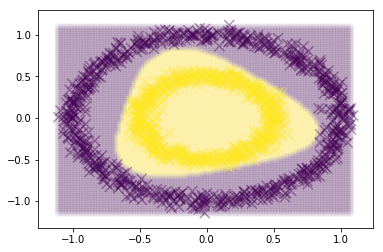

In [5]:
# plot regions for better visualization
test_data = []
for i in np.arange(min(data[:,0]), max(data[:,0]), (max(data[:,0]) - min(data[:,0]))/100.0):
    for j in np.arange(min(data[:,1]), max(data[:,1]), (max(data[:,1]) - min(data[:,1]))/100.0):
        test_data.append([i,j])
        
test_data = np.array(test_data)
test_labels = sess.run(output_labels, feed_dict={x:test_data})

plt.scatter(test_data[:,0], test_data[:,1], c=test_labels, alpha=0.05)
plt.scatter(data[:,0], data[:,1], c=predicted_labels, marker='x', alpha=0.4, s=100)
plt.show()
    